In [2]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')

In [3]:
#let us see what we are working with
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
#let us converts this pandas dataframe into an array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
#now we are goiing to split the dataset into input features and label them as we wish to predict

X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
#now we are going to "normalize" our data. we are going to scale our data to the same order of magnitude to make
#training easier,  we will be using the min-max scaler from scikit-learn to scale it between 0 and 1

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
#now we are going to partition our dataset into a validation and test set. We will use the train_test_split from scikit to 
#acchomplish that goal
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# building and training the first neural network using Keras to construct our architecture

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
#we are going to be using the sequential model that means that we need only describe the layers above in a sequence. Our neural network will have three layers: a hidden layer #1 with 30 neurons using ReLu activation, 
#another hidden layer #2 with 30 neurons also with ReLU activation and an output layer with a single neuron using Sigmoid activation
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [15]:
#we will configure the model by
#informing algo what we want to use to do the optimization (scholatic gradient descent)
#informing algo what loss function to use (binary cross entropy)
#informing algo what other metrics we want (accuracy)
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
#Training on the data is easy and requires a line of code. This is called 'fit'
#we are fitting the parameter to the data, here we shall specify:
#what data we are using to train
#size of mini-batch\
#how many epochs for training we want
#what our validation data is so that we can get feedback
#we will also recieve a histroy output that we will save under the variable list
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6808 - accuracy: 0.5695 - val_loss: 0.6836 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6311 - val_loss: 0.6795 - val_accuracy: 0.6438
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.7133 - val_loss: 0.6761 - val_accuracy: 0.6621
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.7114 - val_loss: 0.6726 - val_accuracy: 0.6621
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7162 - val_loss: 0.6690 - val_accuracy: 0.6758
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.7339 - val_loss: 0.6657 - val_accuracy: 0.6667
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.7299 - val_loss: 0.6622 - val_accuracy: 0.6712
Epoch 8/100
3

In [19]:
#now we are going to evaluate our data using the test set
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9224


0.922374427318573

# visualizing our loss and accuracy
we are going to be importing and using some relevant packages for this bit

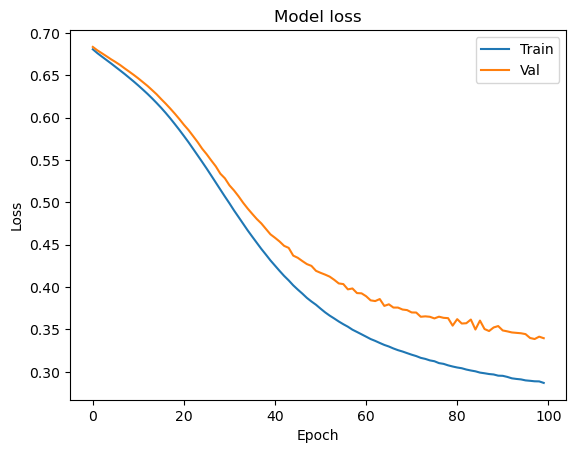

In [20]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [21]:
#as we can see above, our loss goes down as th eepochs continue
#PROGRESS!


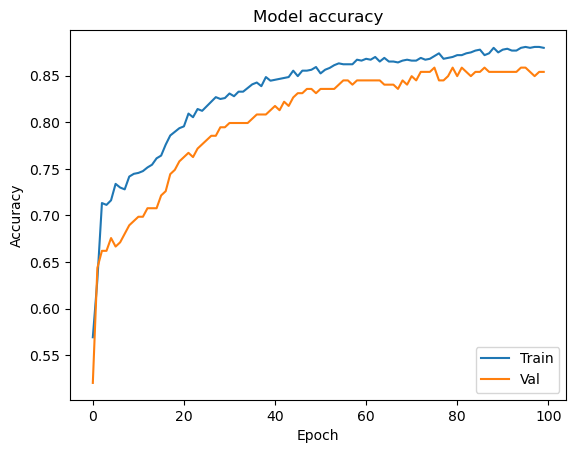

In [24]:
#now lets us look at the training accuracy and validation stats!

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
#as we see above the accuracy started off very rough, but quickly improves after the first epoch

# add regularization to the nueral network
we will train the model which will overfit, this wil be called Model 2

In [26]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.4762 - accuracy: 0.7622 - val_loss: 0.3976 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.3516 - accuracy: 0.8630 - val_loss: 0.3859 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.3064 - accuracy: 0.8757 - val_loss: 0.3866 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2896 - accuracy: 0.8855 - val_loss: 0.3213 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2759 - accuracy: 0.8904 - val_loss: 0.3118 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2777 - accuracy: 0.8865 - val_loss: 0.3086 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2529 - accuracy: 0.8845 - val_loss: 0.3026 - val_accuracy: 0.8767
Epoch 8/100


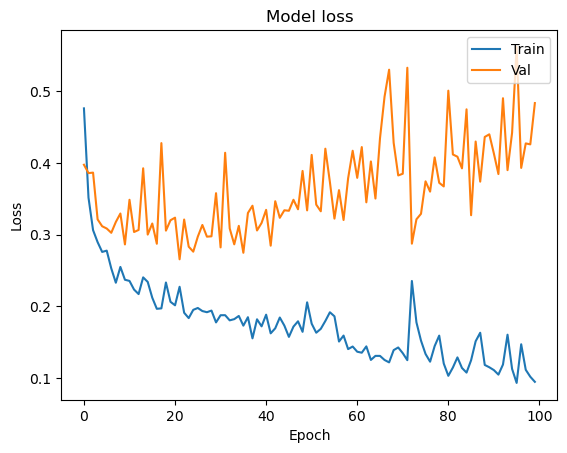

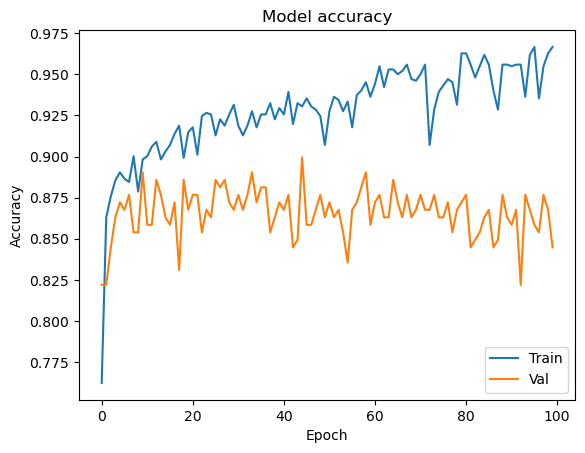

In [27]:
#we are going to replicate pur graphs from above to see how this model performed!
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
#comparing the two models, we see that the neural network with regularization way outperformed mdoel 1

In [29]:
#to address th eoverfitting that occurs in model two, we will use L2 regularization and dropout in lour third model 
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 15ms/step - loss: 14.2346 - accuracy: 0.6243 - val_loss: 3.9178 - val_accuracy: 0.7489
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 1.6716 - accuracy: 0.8297 - val_loss: 0.7347 - val_accuracy: 0.8082
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 0.5699 - accuracy: 0.8503 - val_loss: 0.6700 - val_accuracy: 0.7717
Epoch 4/100
32/32 [==============================] - 0s 10ms/step - loss: 0.5266 - accuracy: 0.8532 - val_loss: 0.5328 - val_accuracy: 0.8402
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.5049 - accuracy: 0.8669 - val_loss: 0.4982 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.4849 - accuracy: 0.8757 - val_loss: 0.4953 - val_accuracy: 0.8493
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 0.4982 - accuracy: 0.8591 - val_loss: 0.4885 - val_accuracy: 0.8630
Epoch 

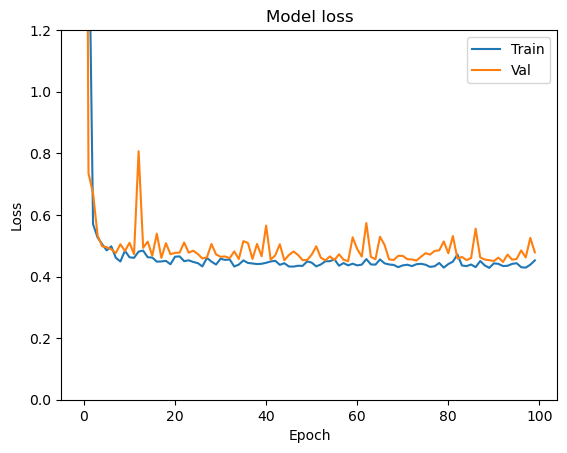

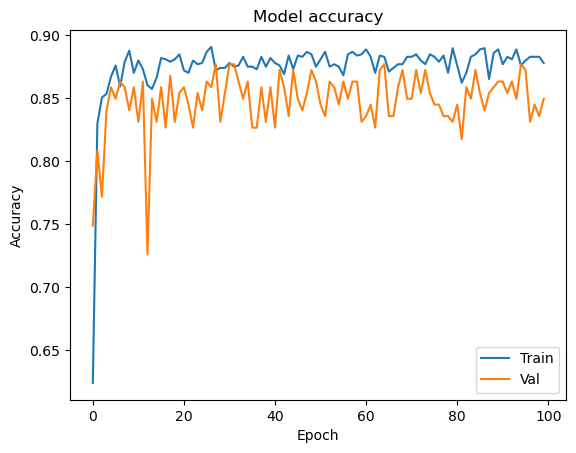

In [31]:
#we will now look at model three's performance. Model 3 has  ahigher loss from the get go, that is due to a change in our
#loss function, we will zoom in between 1.2 and 0 to better view the results

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#As compared to Model 2, you should see that there's less overfitting!